# A/B testing of a binomial proportion

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import btdtri

In [3]:
np.random.seed(12345)

## Data generation

In [4]:
# parameters
total_a = 1000
total_b = 700
rate_a = 0.03
rate_b = 0.05

In [5]:
# binomial distributions
binom_a = stats.binom(n=total_a, p=rate_a)
binom_b = stats.binom(n=total_b, p=rate_b)

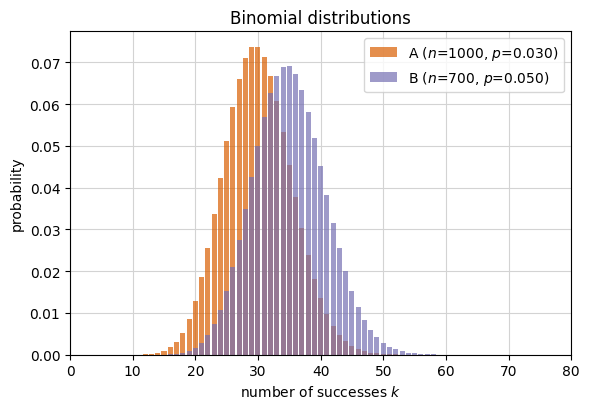

In [6]:
# plot: binomial distributions
x_values = np.arange(0, 81)
prob_a = binom_a.pmf(x_values)
prob_b = binom_b.pmf(x_values)

fig, ax = plt.subplots(figsize=(6, 4.2))
ax.bar(x_values, prob_a, color=plt.cm.Dark2(1), alpha=0.7,
       label='A ($n$={}, $p$={:.3f})'.format(total_a, rate_a))
ax.bar(x_values, prob_b, color=plt.cm.Dark2(2), alpha=0.7,
       label='B ($n$={}, $p$={:.3f})'.format(total_b, rate_b))
ax.set_title('Binomial distributions')
ax.set(xlabel='number of successes $k$', ylabel='probability', xlim=(0, 80))
ax.legend()
ax.grid(visible=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.tight_layout()

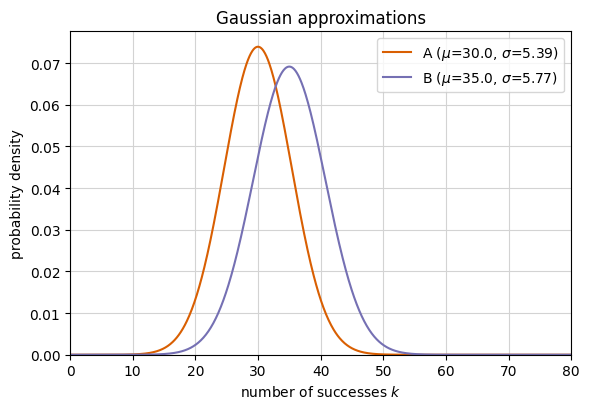

In [7]:
# plot: Gaussian approximations
mu_a = total_a * rate_a
mu_b = total_b * rate_b
sigma_a = np.sqrt(total_a * rate_a * (1-rate_a))
sigma_b = np.sqrt(total_b * rate_b * (1-rate_b))

x_values = np.linspace(0, 80, 1001)
prob_a = stats.norm(loc=mu_a, scale=sigma_a).pdf(x_values)
prob_b = stats.norm(loc=mu_b, scale=sigma_b).pdf(x_values)

fig, ax = plt.subplots(figsize=(6, 4.2))
ax.plot(x_values, prob_a, color=plt.cm.Dark2(1),
        label='A ($\mu$={:.1f}, $\sigma$={:.2f})'.format(mu_a, sigma_a))
ax.plot(x_values, prob_b, color=plt.cm.Dark2(2),
        label='B ($\mu$={:.1f}, $\sigma$={:.2f})'.format(mu_b, sigma_b))
ax.set_title('Gaussian approximations')
ax.set(xlabel='number of successes $k$', ylabel='probability density', xlim=(0, 80))
ax.set_ylim(bottom=0)
ax.legend()
ax.grid(visible=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.tight_layout()

In [8]:
# binomial samples
# successes_a = binom_a.rvs()
# successes_b = binom_b.rvs()

# print('A (n={}, p={}): k={} successes'.format(total_a, rate_a, successes_a))
# print('B (n={}, p={}): k={} successes'.format(total_b, rate_b, successes_b))

In [9]:
# Bernoulli samples
samples_a = stats.bernoulli(p=rate_a).rvs(size=total_a)
samples_b = stats.bernoulli(p=rate_b).rvs(size=total_b)

successes_a = samples_a.sum()
successes_b = samples_b.sum()

print('A (n={}, p={}): k={} successes'.format(total_a, rate_a, successes_a))
print('B (n={}, p={}): k={} successes'.format(total_b, rate_b, successes_b))

A (n=1000, p=0.03): k=27 successes
B (n=700, p=0.05): k=30 successes


## Frequentist parameter estimation

In [10]:
# binomial proportion estimates and their standard deviations
mu_rate_a_hat = successes_a / total_a
mu_rate_b_hat = successes_b / total_b

sigma_rate_a_hat = np.sqrt(mu_rate_a_hat * (1 - mu_rate_a_hat) / total_a)
sigma_rate_b_hat = np.sqrt(mu_rate_b_hat * (1 - mu_rate_b_hat) / total_b)

print('Estimate of the proportion pA: {:.4f}'.format(mu_rate_a_hat))
print('95% confidence interval of pA: [{:.4f}, {:.4f}]'.format(
    mu_rate_a_hat - 1.96*sigma_rate_a_hat,
    mu_rate_a_hat + 1.96*sigma_rate_a_hat
))

print('\nEstimate of the proportion pB: {:.4f}'.format(mu_rate_b_hat))
print('95% confidence interval of pB: [{:.4f}, {:.4f}]'.format(
    mu_rate_b_hat - 1.96*sigma_rate_b_hat,
    mu_rate_b_hat + 1.96*sigma_rate_b_hat
))

Estimate of the proportion pA: 0.0270
95% confidence interval of pA: [0.0170, 0.0370]

Estimate of the proportion pB: 0.0429
95% confidence interval of pB: [0.0279, 0.0579]


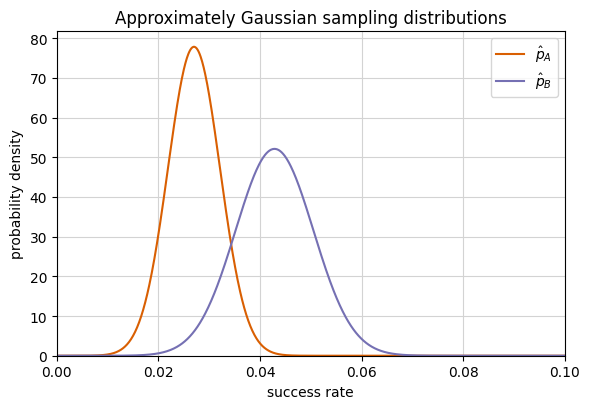

In [11]:
# plot: success rate estimate sampling distributions
x_values = np.linspace(0, 0.1, 1001)
prob_a = stats.norm(loc=mu_rate_a_hat, scale=sigma_rate_a_hat).pdf(x_values)
prob_b = stats.norm(loc=mu_rate_b_hat, scale=sigma_rate_b_hat).pdf(x_values)

fig, ax = plt.subplots(figsize=(6, 4.2))
ax.plot(x_values, prob_a, color=plt.cm.Dark2(1), label='$\hat{p}_A$')
ax.plot(x_values, prob_b, color=plt.cm.Dark2(2), label='$\hat{p}_B$')
ax.set_title('Approximately Gaussian sampling distributions')
ax.set(xlabel='success rate', ylabel='probability density', xlim=(0, 0.1))
ax.set_ylim(bottom=0)
ax.legend()
ax.grid(visible=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.tight_layout()

In [12]:
# estimate of the difference
mu_diff_hat = mu_rate_b_hat - mu_rate_a_hat
sigma_diff_hat = np.sqrt(sigma_rate_b_hat**2 + sigma_rate_a_hat**2)

print('Estimate of the difference pB-pA: {:.4f}'.format(mu_diff_hat))
print('95% confidence interval of pB-pA: [{:.4f}, {:.4f}]'.format(
    mu_diff_hat - 1.96*sigma_diff_hat,
    mu_diff_hat + 1.96*sigma_diff_hat
))

Estimate of the difference pB-pA: 0.0159
95% confidence interval of pB-pA: [-0.0022, 0.0339]


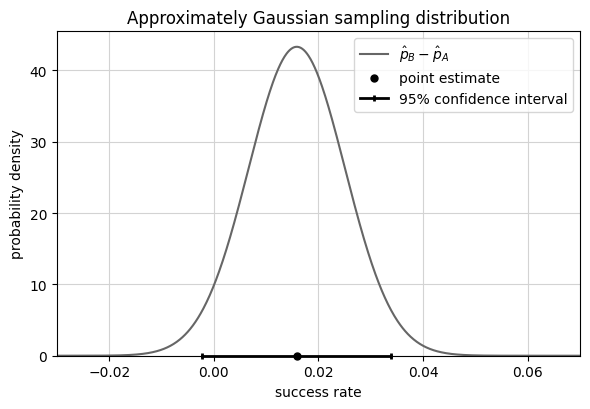

In [13]:
# plot: difference estimate sampling distribution
x_values = np.linspace(-0.03, 0.07, 1001)
prob = stats.norm(loc=mu_diff_hat, scale=sigma_diff_hat).pdf(x_values)

fig, ax = plt.subplots(figsize=(6, 4.2))
line_distribution = ax.plot(x_values, prob, color=plt.cm.Dark2(7))
point_estimate = ax.scatter(mu_diff_hat, 0, s=25, marker='o', color='k', clip_on=False)
line_confidence = ax.plot(
    [mu_diff_hat-1.96*sigma_diff_hat, mu_diff_hat+1.96*sigma_diff_hat], [0,0],
    linewidth=2, marker='|', markersize=5, markeredgewidth=2, color='k', clip_on=False
)
ax.set_title('Approximately Gaussian sampling distribution')
ax.set(xlabel='success rate', ylabel='probability density', xlim=(-0.03, 0.07))
ax.set_ylim(bottom=0)
ax.legend(
    (line_distribution[0], point_estimate, line_confidence[0]),
    ('$\hat{p}_B - \hat{p}_A$', 'point estimate', '95% confidence interval')
)
ax.grid(visible=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.tight_layout()

## Frequentist A/B testing

In [14]:
# null and alternative hypothesis (two-sample, one-sided)
alpha = 0.05

print('H0: pB-pA (<)= 0')
print('H1: pB-pA > 0')
print('Pre-chosen significance level: {:.2f}'.format(alpha))

H0: pB-pA (<)= 0
H1: pB-pA > 0
Pre-chosen significance level: 0.05


In [15]:
# z-score and p-value
z_score = mu_diff_hat / sigma_diff_hat
p_value = 1 - stats.norm(loc=0, scale=1).cdf(z_score)

print('z-score: {:.4f}'.format(z_score))
print('p-value: {:.4f}'.format(p_value))

if p_value <= alpha:
    print('We reject the null hypothesis, in favor of the alternative.')
else:
    print('We fail to reject the null hypothesis, it is "accepted".')

z-score: 1.7212
p-value: 0.0426
We reject the null hypothesis, in favor of the alternative.


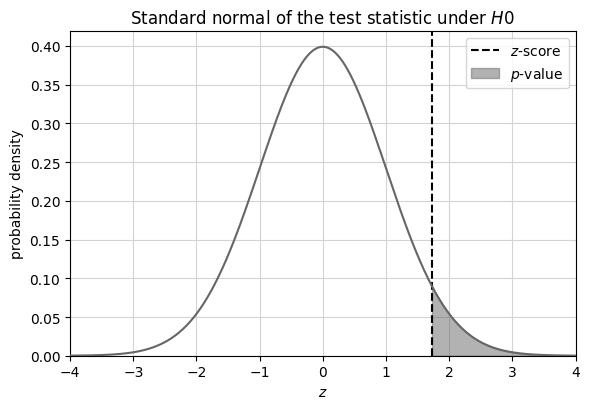

In [16]:
# plot: z-score and p-value
x_values = np.linspace(-4, 4, 1001)
y_values = stats.norm().pdf(x_values)

fig, ax = plt.subplots(figsize=(6, 4.2))
ax.plot(x_values, y_values, color=plt.cm.Dark2(7), zorder=3)
ax.axvline(z_score, linestyle='--', color='k', zorder=2, label='$z$-score')
ax.fill_between(
    x_values[x_values>=z_score], y_values[x_values>=z_score],
    color=plt.cm.Dark2(7), alpha=0.5, zorder=1, label='$p$-value'
)
ax.set_title('Standard normal of the test statistic under $H0$')
ax.set(xlabel='$z$', ylabel='probability density', xlim=(-4, 4))
ax.set_ylim(bottom=0)
ax.legend()
ax.grid(visible=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.tight_layout()

## Bayesian parameter estimation

In [17]:
# prior distributions
prior_alpha = 1
prior_beta = 1

prior = stats.beta(a=prior_alpha, b=prior_beta)

In [18]:
# posterior distributions
post_a_alpha = prior_alpha + successes_a
post_a_beta = prior_beta + total_a - successes_a

post_b_alpha = prior_alpha + successes_b
post_b_beta = prior_beta + total_b - successes_b

post_a = stats.beta(a=post_a_alpha, b=post_a_beta)
post_b = stats.beta(a=post_b_alpha, b=post_b_beta)

In [19]:
# posterior summaries
post_mode_a = (post_a_alpha - 1) / (post_a_alpha + post_a_beta - 2)
post_mode_b = (post_b_alpha - 1) / (post_b_alpha + post_b_beta - 2)

post_credint_a = [
    btdtri(post_a_alpha, post_a_beta, 0.05),
    btdtri(post_a_alpha, post_a_beta, 0.95)
]
post_credint_b = [
    btdtri(post_b_alpha, post_b_beta, 0.05),
    btdtri(post_b_alpha, post_b_beta, 0.95)
]

print('Posterior mode of pA: {:.4f}'.format(post_mode_a))
print('Posterior mode of pB: {:.4f}'.format(post_mode_b))

print('\nPosterior mean of pA: {:.4f}'.format(post_a.mean()))
print('Posterior mean of pB: {:.4f}'.format(post_b.mean()))

print('\n90% credible interval of pA: [{:.4f}, {:.4f}]'.format(*post_credint_a))
print('90% credible interval of pB: [{:.4f}, {:.4f}]'.format(*post_credint_b))

Posterior mode of pA: 0.0270
Posterior mode of pB: 0.0429

Posterior mean of pA: 0.0279
Posterior mean of pB: 0.0442

90% credible interval of pA: [0.0200, 0.0370]
90% credible interval of pB: [0.0322, 0.0576]


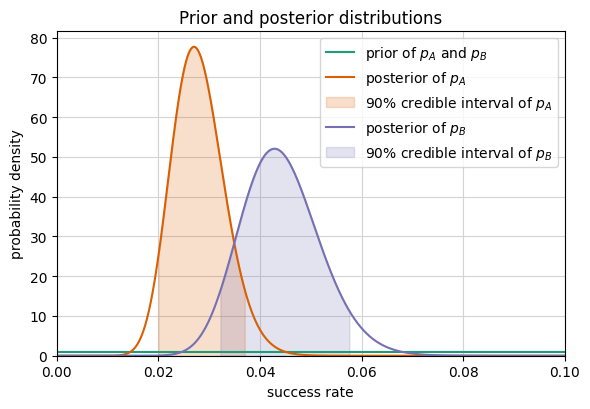

In [20]:
# plot: posterior distributions (1D)
x_values = np.linspace(0, 0.1, 1001)

fig, ax = plt.subplots(figsize=(6, 4.2))
ax.plot(x_values, prior.pdf(x_values), color=plt.cm.Dark2(0), label='prior of $p_A$ and $p_B$')
ax.plot(x_values, post_a.pdf(x_values), color=plt.cm.Dark2(1), label='posterior of $p_A$')
ax.fill_between(
    x_values[np.logical_and(x_values>=post_credint_a[0], x_values<=post_credint_a[1])],
    post_a.pdf(x_values[np.logical_and(x_values>=post_credint_a[0], x_values<=post_credint_a[1])]),
    color=plt.cm.Dark2(1), alpha=0.2, label='$90$% credible interval of $p_A$'
)
ax.plot(x_values, post_b.pdf(x_values), color=plt.cm.Dark2(2), label='posterior of $p_B$')
ax.fill_between(
    x_values[np.logical_and(x_values>=post_credint_b[0], x_values<=post_credint_b[1])],
    post_b.pdf(x_values[np.logical_and(x_values>=post_credint_b[0], x_values<=post_credint_b[1])]),
    color=plt.cm.Dark2(2), alpha=0.2, label='$90$% credible interval of $p_B$'
)
ax.set_title('Prior and posterior distributions')
ax.set(xlabel='success rate', ylabel='probability density', xlim=(0, 0.1))
ax.set_ylim(bottom=0)
ax.legend()
ax.grid(visible=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.tight_layout()

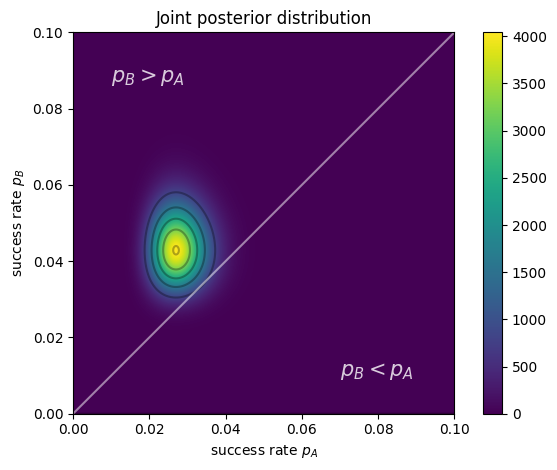

In [21]:
# plot: joint posterior distribution (2D)
x_values = np.linspace(0, 0.1, 1001)
y_values = np.linspace(0, 0.1, 1001)
X, Y = np.meshgrid(x_values, y_values)
Z = post_a.pdf(X) * post_b.pdf(Y)

fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=5, colors='black', alpha=0.3)
im = ax.imshow(Z, extent=(0, 0.1, 0, 0.1), origin='lower', cmap='viridis', interpolation='bilinear')
ax.plot([0, 0.1], [0, 0.1], color='w', alpha=0.5)
ax.text(0.01, 0.087, '$p_B > p_A$', fontdict=dict(size=15, color='w', alpha=0.8))
ax.text(0.07, 0.01, '$p_B < p_A$', fontdict=dict(size=15, color='w', alpha=0.8))
fig.colorbar(im)
ax.set_title('Joint posterior distribution')
ax.set(xlabel='success rate $p_A$', ylabel='success rate $p_B$')
ax.set_axisbelow(True)
fig.tight_layout()

## Bayesian A/B testing

In [22]:
# posterior samples
num_samples = int(1e06)

post_samples_a = post_a.rvs(num_samples)
post_samples_b = post_b.rvs(num_samples)

In [23]:
# posterior summaries
post_prob_b_better = np.mean(post_samples_b > post_samples_a)
post_expected_diff = post_b.mean() - post_a.mean()

print('P(pB>pA) = {:.2f}%'.format(post_prob_b_better*100))
print('E[pB-pA] = {:.4f}'.format(post_expected_diff))

P(pB>pA) = 96.28%
E[pB-pA] = 0.0162


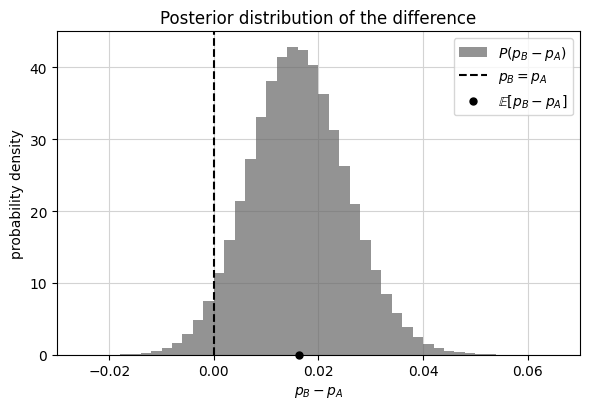

In [24]:
# plot: posterior of the difference
fig, ax = plt.subplots(figsize=(6, 4.2))
_, _, hist = ax.hist(
    post_samples_b - post_samples_a, bins=np.linspace(-0.03, 0.07, 51), density=True,
    histtype='stepfilled', color=plt.cm.Dark2(7), alpha=0.7, zorder=1
)
line = ax.axvline(0, linestyle='--', color='k', zorder=2)
mean = ax.scatter(post_expected_diff, 0, s=25, marker='o', color='k', clip_on=False, zorder=3)
ax.set_title('Posterior distribution of the difference')
ax.set(xlabel='$p_B - p_A$', ylabel='probability density', xlim=(-0.03, 0.07))
ax.legend((hist[0], line, mean), ('$P(p_B - p_A)$', '$p_B = p_A$', '$\mathbb{E}[p_B-p_A]$'))
ax.grid(visible=True, which='both', color='lightgray', linestyle='-')
ax.set_axisbelow(True)
fig.tight_layout()